In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Low regularization
clf = Ridge(alpha=.01)

# Load the DataFrame
df = pd.read_csv('hpi_master.csv')

df = df.dropna(subset=["index_sa"])
df = df[df["index_sa"]<450]

# One-hot encode 'place_name'
place_name_encoded = pd.get_dummies(df["place_name"], drop_first=True)


# Concatenate 'yr' and the encoded 'place_name'
X = pd.concat([df[["yr"]], place_name_encoded], axis=1)

# Define the target variable y
y = df["index_sa"]

# Train 90%, Test 10%
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.1)

# Fit the model
clf.fit(Xtrain, Ytrain)


Ridge(alpha=0.01)

In [2]:
# Test how accurate the regression was
from sklearn.metrics import mean_squared_error, r2_score

#predicting using Xtest
prediction =  clf.predict(Xtest)

mse = mean_squared_error(prediction, Ytest)
print(mse)


1506.6644045276532


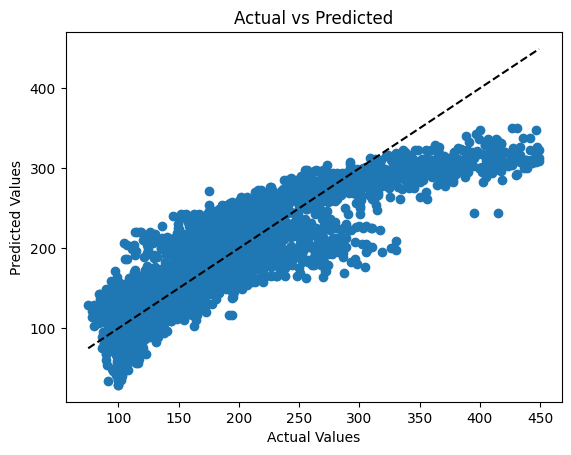

R² Score: 0.7572892439588863


In [3]:
# Matplotlib visualizer
plt.scatter(Ytest, prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()], 'k--')  # Diagonal line
plt.show()

# Calculate R^2 value
r_squared = r2_score(Ytest, prediction)
print("R² Score:", r_squared)